In [2]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

sns.set(style="darkgrid")

# disable warings
import warnings
warnings.filterwarnings('ignore')

In [3]:
path_to_data = '../recipes/acoustic_echo_retrieval/results/synt/'
files = glob(path_to_data + '*.csv')
results = pd.DataFrame()
for file in files:
    res = pd.read_csv(file)
    results = results.append(res, ignore_index=True)
    print(file)

../recipes/acoustic_echo_retrieval/results/synt/aer_crocco.csv


In [4]:
results

,Unnamed: 0,dataset,data,n_mics,target,thr_smpl,mean_f,mean_p,mean_r,mean_e
0,0,11000,synt,2.0,0.0,1.0,0.748252,0.916667,0.642857,0.202348
1,1,11000,synt,2.0,0.0,3.0,0.748252,0.916667,0.642857,0.202348
2,2,11000,synt,2.0,0.0,5.0,0.748252,0.916667,0.642857,0.202348
3,3,11000,real,2.0,0.0,1.0,0.055514,0.034722,0.142857,0.161722
4,4,11000,real,2.0,0.0,3.0,0.055514,0.034722,0.142857,0.161722
...,...,...,...,...,...,...,...,...,...,...
202,202,11111,synt,4.0,3.0,3.0,0.821429,0.821429,0.821429,0.606118
203,203,11111,synt,4.0,3.0,5.0,0.821429,0.821429,0.821429,0.606118
204,204,11111,real,4.0,3.0,1.0,0.071429,0.071429,0.071429,0.358444
205,205,11111,real,4.0,3.0,3.0,0.178571,0.178571,0.178571,1.161121


In [5]:
# check values
print(pd.unique(results.loc[:, 'dataset']))
print(pd.unique(results.loc[:, 'n_mics']))
print(pd.unique(results.loc[:, 'target']))
print(pd.unique(results.loc[:, 'thr_smpl']))
print(pd.unique(results.loc[:, 'data']))

[11000 11110 11111]
[2. 4. 6.]
[0. 1. 2. 3.]
[1. 3. 5.]
['synt' 'real']


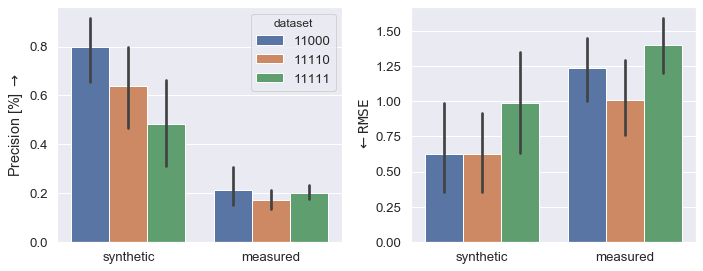

In [46]:
loc_res = results.loc[
      (results['thr_smpl']==3)]

sns.set(font_scale=1.2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

loc_res = loc_res.replace('real', value='measured')
loc_res = loc_res.replace('synt', value='synthetic')

ax1 = sns.barplot(x='data', y='mean_p', hue='dataset', data=loc_res, ax=ax1)
ax1.set(ylabel=r'Precision [%] $\rightarrow$', xlabel='')

ax2 = sns.barplot(x='data', y='mean_e', hue='dataset', data=loc_res, ax=ax2)
ax2.set(ylabel=r'$\leftarrow \mathtt{RMSE}$', xlabel='')
ax2.legend_.remove()

# plt.legend(bbox_to_anchor=(1.05, .7), loc=9, borderaxespad=0.)

plt.tight_layout()
plt.savefig('../recipes/acoustic_echo_retrieval/results.pdf', dpi=300)

plt.show()
